# Тестовое задание
На предоставленных данных необходимо решить две задачи:

1. Построить две диаграммы распределения созданий резюме для студентов, начинающих карьеру – отдельно для male и female. Сделать выводы из полученных данных.
2. Спрогнозировать объем трафика для сегмента «Informacionnye-tehnologii-Internet-Telekom», построить прогноз на месяц вперед. Указать, какие данные понадобятся для построения более корректного прогноза. Описать подход к этой задаче при возможности доступа к любым данным.

In [1]:
# Импортируем библиотеки
import pandas as pd # Основные интсрументы анализа данных
import matplotlib as plt # Работа с диаграммами
import seaborn as sns # Работа с диаграммами

## 1. Изучение и обработка данных
В переменную df считаем данные, затем выведем первые 10 записей и проведем первичный анализ.

In [2]:
df = pd.read_csv('test_data.csv')
df.head(10)

,Date,Category,Age,Gender,Sessions,Users,Goals
0,2020-03-02,Prodazhi,25-34,female,22235,10504,185
1,2020-03-03,Prodazhi,25-34,female,20423,10425,181
2,2020-03-10,Prodazhi,25-34,female,19784,10167,205
3,2020-03-04,Prodazhi,25-34,female,19394,9917,174
4,2020-03-11,Prodazhi,25-34,female,18875,9813,214
5,2020-03-02,Buhgalterija-Upravlencheskij-uchet-Finansy-pre...,25-34,female,18187,8687,78
6,2020-03-05,Prodazhi,25-34,female,17747,9173,152
7,2020-03-02,Informacionnye-tehnologii-Internet-Telekom,25-34,male,17620,8735,85
8,2020-03-03,Informacionnye-tehnologii-Internet-Telekom,25-34,male,17532,8911,79
9,2020-03-23,Prodazhi,25-34,female,17330,8755,191


In [3]:
df.info()
print('Количество явных дубликатов:', df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28819 entries, 0 to 28818
Data columns (total 7 columns):
Date        28819 non-null object
Category    28819 non-null object
Age         28819 non-null object
Gender      28819 non-null object
Sessions    28819 non-null int64
Users       28819 non-null int64
Goals       28819 non-null int64
dtypes: int64(3), object(4)
memory usage: 1.5+ MB
Количество явных дубликатов: 0


Таблица имеет 28819 записей в 7 столбцах:
* `Date` - дата записи;
* `Category` - направление деятельности;
* `Age` - возрастная группа;
* `Gender` - пол;
* `Sessions` - количество посещений;
* `Users` - количество пользователей (скорее всего - уникальных);
* `Goals` - количество созданных резюме.

Пропусков в данных нет, явных дубликатов в таблице не найдено.<br>
Заменим названия столбцов, приведя все буквы в нижний регистр. Затем проверим, есть ли неявные дубликаты в столбце `Category`:

In [4]:
df.columns = df.columns.str.lower()
print('Уникальные платформы:', df['category'].unique())

Уникальные платформы: ['Prodazhi' 'Buhgalterija-Upravlencheskij-uchet-Finansy-predprijatija'
 'Informacionnye-tehnologii-Internet-Telekom' 'Administrativnyj-personal'
 'Proizvodstvo' 'Transport-Logistika' 'Nachalo-karery-Studenty'
 'Stroitelstvo-Nedvizhimost' 'Marketing-Reklama-PR'
 'Upravlenie-personalom-Treningi' 'Vysshij-menedzhment'
 'Banki-Investicii-Lizing' 'Juristy' 'Rabochij-personal'
 'Medicina-Farmacevtika' 'Iskusstvo-Razvlechenija-Mass-media'
 'Turizm-Gostinicy-Restorany' 'Bezopasnost' 'Avtomobilnyj-biznes'
 'Zakupki' 'Dobycha-Syrja' 'Nauka-Obrazovanie'
 'Sportivnye-kluby-fitnes-salony-krasoty'
 'Gosudarstvennaja-sluzhba-nekommercheskie-organizacii' 'Konsultirovanie'
 'Strahovanie' 'Installjacija-i-servis' 'Domashnij-personal']


Неявных дубликатов в столбце категорий нет.<br>
Для удобства дальнейшей работы работы заменим тип данных в столбце `Date` на datetime:

In [5]:
df['date'] = pd.to_datetime(df['date'], format = ('%Y.%m.%d'))

## 2. Построение диаграмм распределения
Построим столбчатую диаграмму созданий резюме для студентов, начинающих карьеру отедльно для мужчин и женщин. Для наглядности сделаем это на одном графике.

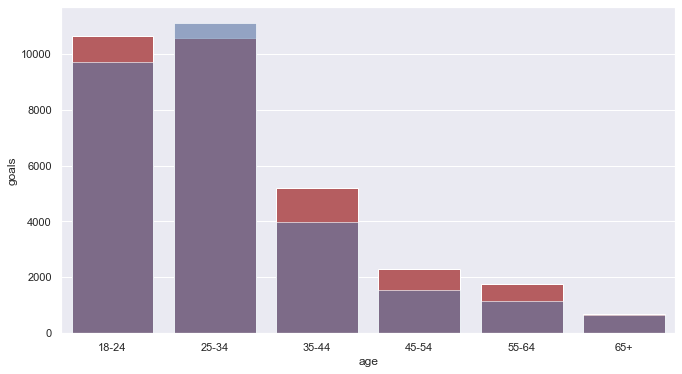

In [6]:
sns.set(rc={'figure.figsize':(11,6)})
sns.barplot(x='age', y='goals', data=df.query(
    'gender == "female" and category == "Nachalo-karery-Studenty"').pivot_table(
    index = 'age', values = 'goals', aggfunc = 'sum').reset_index(), color = 'r')
sns.barplot(x='age', y='goals', data=df.query(
    'gender == "male" and category == "Nachalo-karery-Studenty"').pivot_table(
    index = 'age', values = 'goals', aggfunc = 'sum').reset_index(), color = 'b', alpha = 0.6)

Красным на диаграмме представлены женщины, голубым - мужчины.<br>
* Видно, что практически во всех возрастных категориях женщины создают на 15-20% больше резюме, чем мужчины. Только в категории 25-34 мужчины имеют перевес в 5% по количеству созданных резюме. Учитывая, что женщин в России практически на 10% больше - выглядит совершенно логично.
* Наиболее популярными возрастными категориями для поиска работы являются категории 18-24 и 25-34, причем женщины распределены практически одинаково, а мужчины на 10% чаще начинают карьеру в возрасте 25-34. Возможно, это связано с тем, что если мужчина до получения высшего образования тратит год на армию, он, скорее всего, попадает в возрастную категорию не 18-24, а 25-34.
* Начиная с возрастной категории 25-34 количество созданных резюме резко падает - практически в 2 раза меньше для каждой следующей категории.

## 3. Прогнозирование объема трафика

Учитывая, что объем трафика необходимо спрогнозировать на следующий месяц, логично разделить данные на категории по месяцам. Выделим их:

In [7]:
df['month'] = pd.DatetimeIndex(df['date']).month
df['year'] = pd.DatetimeIndex(df['date']).year
df.head()

,date,category,age,gender,sessions,users,goals,month,year
0,2020-03-02,Prodazhi,25-34,female,22235,10504,185,3,2020
1,2020-03-03,Prodazhi,25-34,female,20423,10425,181,3,2020
2,2020-03-10,Prodazhi,25-34,female,19784,10167,205,3,2020
3,2020-03-04,Prodazhi,25-34,female,19394,9917,174,3,2020
4,2020-03-11,Prodazhi,25-34,female,18875,9813,214,3,2020


Мы имеем дело с данными за весенние месяцы 2020 года. Создадим сводную таблицу по месяцам:

In [8]:
df.query('category == "Informacionnye-tehnologii-Internet-Telekom"').pivot_table(
    index = 'month', values = 'sessions', aggfunc='sum')

,sessions
month,
3,868535
4,259864
5,271439


Имеем дело с чем-то, что к лету резко теряет свою актуальность - больше, чем в 2.5 раза. Если судить по тренду за 4 и 5 месяцы, то можно предположить о трафике около 285000 посещений в шестом месяце.<br>

In [9]:
df.query('category == "Informacionnye-tehnologii-Internet-Telekom"').pivot_table(
    index = 'month', values = 'users', aggfunc='sum')

,users
month,
3,482177
4,191035
5,197740


Аналогичная ситуация и с пользователями. В шестом месяце можно ожидать около 205 тысяч пользователей.

Для построения более корректного прогноза необходимо уточнить статистику посещения чего мы исследуем – это поможет понять причину резкого падения активности. Также хорошо было бы взглянуть на месячные данные прошлых лет, хотя бы за два-три предыдущих года – возможно, это сезонное поведение объема трафика. Еще необходимо узнать не проводилось ли каких-то изменений в продукте, которые могли бы так негативно сказаться на трафике. И, конечно, нельзя забывать про рекламу – возможно, значение в 870 тысяч посетителей связано именно с ней – и после окончания рекламной кампании трафик вернулся в начальное состояние (или, скорее всего, чуть выше него, учитывая остаточный эффект).